Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [110]:
import pandas as pd

df_city_bikes = pd.read_csv('data/df_city_bike.csv')
df_foursquare = pd.read_csv('data/df_foursquare_20.csv')
df_yelp = pd.read_csv('data/df_yelp.csv')

In [111]:
merged_df = df_city_bikes.copy()
merged_df = merged_df.rename(columns={merged_df.columns[0]: 'station_no'})
merged_df.head()

,station_no,name,empty_slots,free_bikes,slots,latitude,longitude
0,0,Cégep Marie-Victorin,9,2,11,45.617500,-73.606011
1,1,Gare d'autocars de Montréal (Berri / Ontario),0,11,15,45.516926,-73.564257
2,2,Molson / William-Tremblay,12,2,15,45.541549,-73.565012
3,3,Ateliers municipaux de St-Laurent (Cavendish /...,4,13,19,45.506176,-73.711186
4,4,Place Rodolphe-Rousseau (Gohier / Édouard-Laurin),9,11,25,45.512994,-73.682498


In [112]:
#getting average ratings for parks per station
avg_rating = df_yelp.groupby('row_from_station').agg({'rating': 'mean', 'review_count': 'sum'}).reset_index()
avg_rating.columns = ['row_from_station', 'avg_rating', 'total_review_count']
#merging average ratings and city_bikes dataframe
merged_df = merged_df.merge(avg_rating, left_on='station_no', right_on='row_from_station', how='left')
#droping the 'row_from_station' column
merged_df = merged_df.drop('row_from_station', axis=1)

In [113]:
# Count the number of rows with the same value in 'row_from_station' and get the corresponding values
count_rows = df_yelp['row_from_station'].value_counts().reset_index()
# Rename the columns for clarity
count_rows.columns = ['row_from_station', 'POI']
merged_df = merged_df.merge(count_rows, left_on='station_no', right_on='row_from_station', how='left')
#droping the 'row_from_station' column
merged_df = merged_df.drop('row_from_station', axis=1)

### Adding Foursquare data

In [115]:
df_foursquare_parks = df_foursquare[(df_foursquare['category_id'] >= 16032) & (df_foursquare['category_id'] <= 16039)]
df_foursquare_parks.head()

,row_from_station,fsq_id,category_id,name,latitude,longitude,rating,total_ratings,total_photos,total_tips
1,0,515f0eebe4b037e78a1ce80b,16032.0,Parc Hadley,45.444031,-73.576668,NaN,NaN,NaN,NaN
2,0,5179c6db498e11ab2e537f08,16032.0,Parc du Quai-de-la-Tortue,45.447545,-73.571364,7.6,11.0,12.0,1.0
7,0,4ca87e3844a8224bedf11740,16032.0,Parc Honorable George O'Reilly,45.446154,-73.572770,NaN,NaN,NaN,NaN
40,2,4e0de9987d8bb178a8a3496c,16032.0,Parc Aimé-Léonard,45.610015,-73.636813,6.7,10.0,11.0,2.0
82,4,4ad4c06cf964a520f0f920e3,16032.0,Société d'Animation de la Promenade Bellerive,45.594922,-73.509120,8.3,51.0,75.0,6.0


In [92]:
#getting average ratings for parks per station
avg_rating_fsq = df_foursquare_parks.groupby('row_from_station').agg({'rating': 'mean', 'total_ratings': 'sum'}).reset_index()
avg_rating_fsq.columns = ['row_from_station', 'avg_rating_fsq', 'total_ratings_count_fsq']
#merging average ratings and city_bikes dataframe
merged_df = merged_df.merge(avg_rating_fsq, left_on='station_no', right_on='row_from_station', how='left')
#droping the 'row_from_station' column
merged_df = merged_df.drop('row_from_station', axis=1)

In [93]:
# Count the number of rows with the same value in 'row_from_station' and get the corresponding values
count_rows_fsq = df_foursquare_parks['row_from_station'].value_counts().reset_index()
# Rename the columns for clarity
count_rows_fsq.columns = ['row_from_station', 'POI_fsq']
merged_df = merged_df.merge(count_rows_fsq, left_on='station_no', right_on='row_from_station', how='left')
#droping the 'row_from_station' column
merged_df = merged_df.drop('row_from_station', axis=1)

In [94]:
merged_df.to_csv('data/merged_df.csv', index=False)

In [81]:
merged_df.head()

,station_no,name,empty_slots,free_bikes,slots,latitude,longitude,avg_rating,total_review_count,POI,avg_rating_fsq,total_ratings_count_fsq,POI_fsq
0,0,Cégep Marie-Victorin,9,2,11,45.617500,-73.606011,NaN,NaN,NaN,7.6,11.0,3.0
1,1,Gare d'autocars de Montréal (Berri / Ontario),0,11,15,45.516926,-73.564257,4.0,67.0,7.0,NaN,NaN,NaN
2,2,Molson / William-Tremblay,12,2,15,45.541549,-73.565012,4.0,5.0,4.0,6.7,10.0,1.0
3,3,Ateliers municipaux de St-Laurent (Cavendish /...,4,13,19,45.506176,-73.711186,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Place Rodolphe-Rousseau (Gohier / Édouard-Laurin),9,11,25,45.512994,-73.682498,4.0,1.0,1.0,8.3,51.0,1.0


In [98]:
# Remove rows with NaN values
merged_df_no_na = merged_df.dropna()
# Remove rows with NaN values from a specific subset of columns from Foursquare
merged_df_no_na_fsq = merged_df.dropna(subset=['avg_rating_fsq', 'total_ratings_count_fsq', 'POI_fsq'])

# Remove rows with NaN values from a specific subset of columns from Yelp
merged_df_no_na_yelp = merged_df.dropna(subset=['avg_rating', 'total_review_count', 'POI'])

print(merged_df_no_na.shape)
print(merged_df_no_na_yelp.shape)
print(merged_df_no_na_fsq.shape)

(191, 13)
(584, 13)
(241, 13)


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [117]:
merged_df.describe()

,station_no,empty_slots,free_bikes,slots,latitude,longitude,avg_rating,total_review_count,POI
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,584.000000,584.000000,584.000000
mean,371.500000,13.393817,7.349462,22.157258,45.523044,-73.594727,4.159680,45.996575,5.099315
std,214.918589,7.656629,6.373010,7.330370,0.039321,0.047151,0.385335,69.750990,3.057550
min,0.000000,0.000000,0.000000,11.000000,45.415747,-73.758227,2.000000,1.000000,1.000000
25%,185.750000,8.000000,2.000000,19.000000,45.501432,-73.616520,4.000000,6.000000,2.000000
50%,371.500000,13.000000,6.000000,19.000000,45.524438,-73.583520,4.158333,23.000000,5.000000
75%,557.250000,18.000000,11.000000,24.000000,45.545069,-73.565387,4.333333,57.250000,7.000000
max,743.000000,53.000000,46.000000,81.000000,45.651406,-73.443121,5.000000,431.000000,14.000000


In [118]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 743
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   station_no          744 non-null    int64  
 1   name                744 non-null    object 
 2   empty_slots         744 non-null    int64  
 3   free_bikes          744 non-null    int64  
 4   slots               744 non-null    int64  
 5   latitude            744 non-null    float64
 6   longitude           744 non-null    float64
 7   avg_rating          584 non-null    float64
 8   total_review_count  584 non-null    float64
 9   POI                 584 non-null    float64
dtypes: float64(5), int64(4), object(1)
memory usage: 63.9+ KB


In [99]:
import seaborn as sns

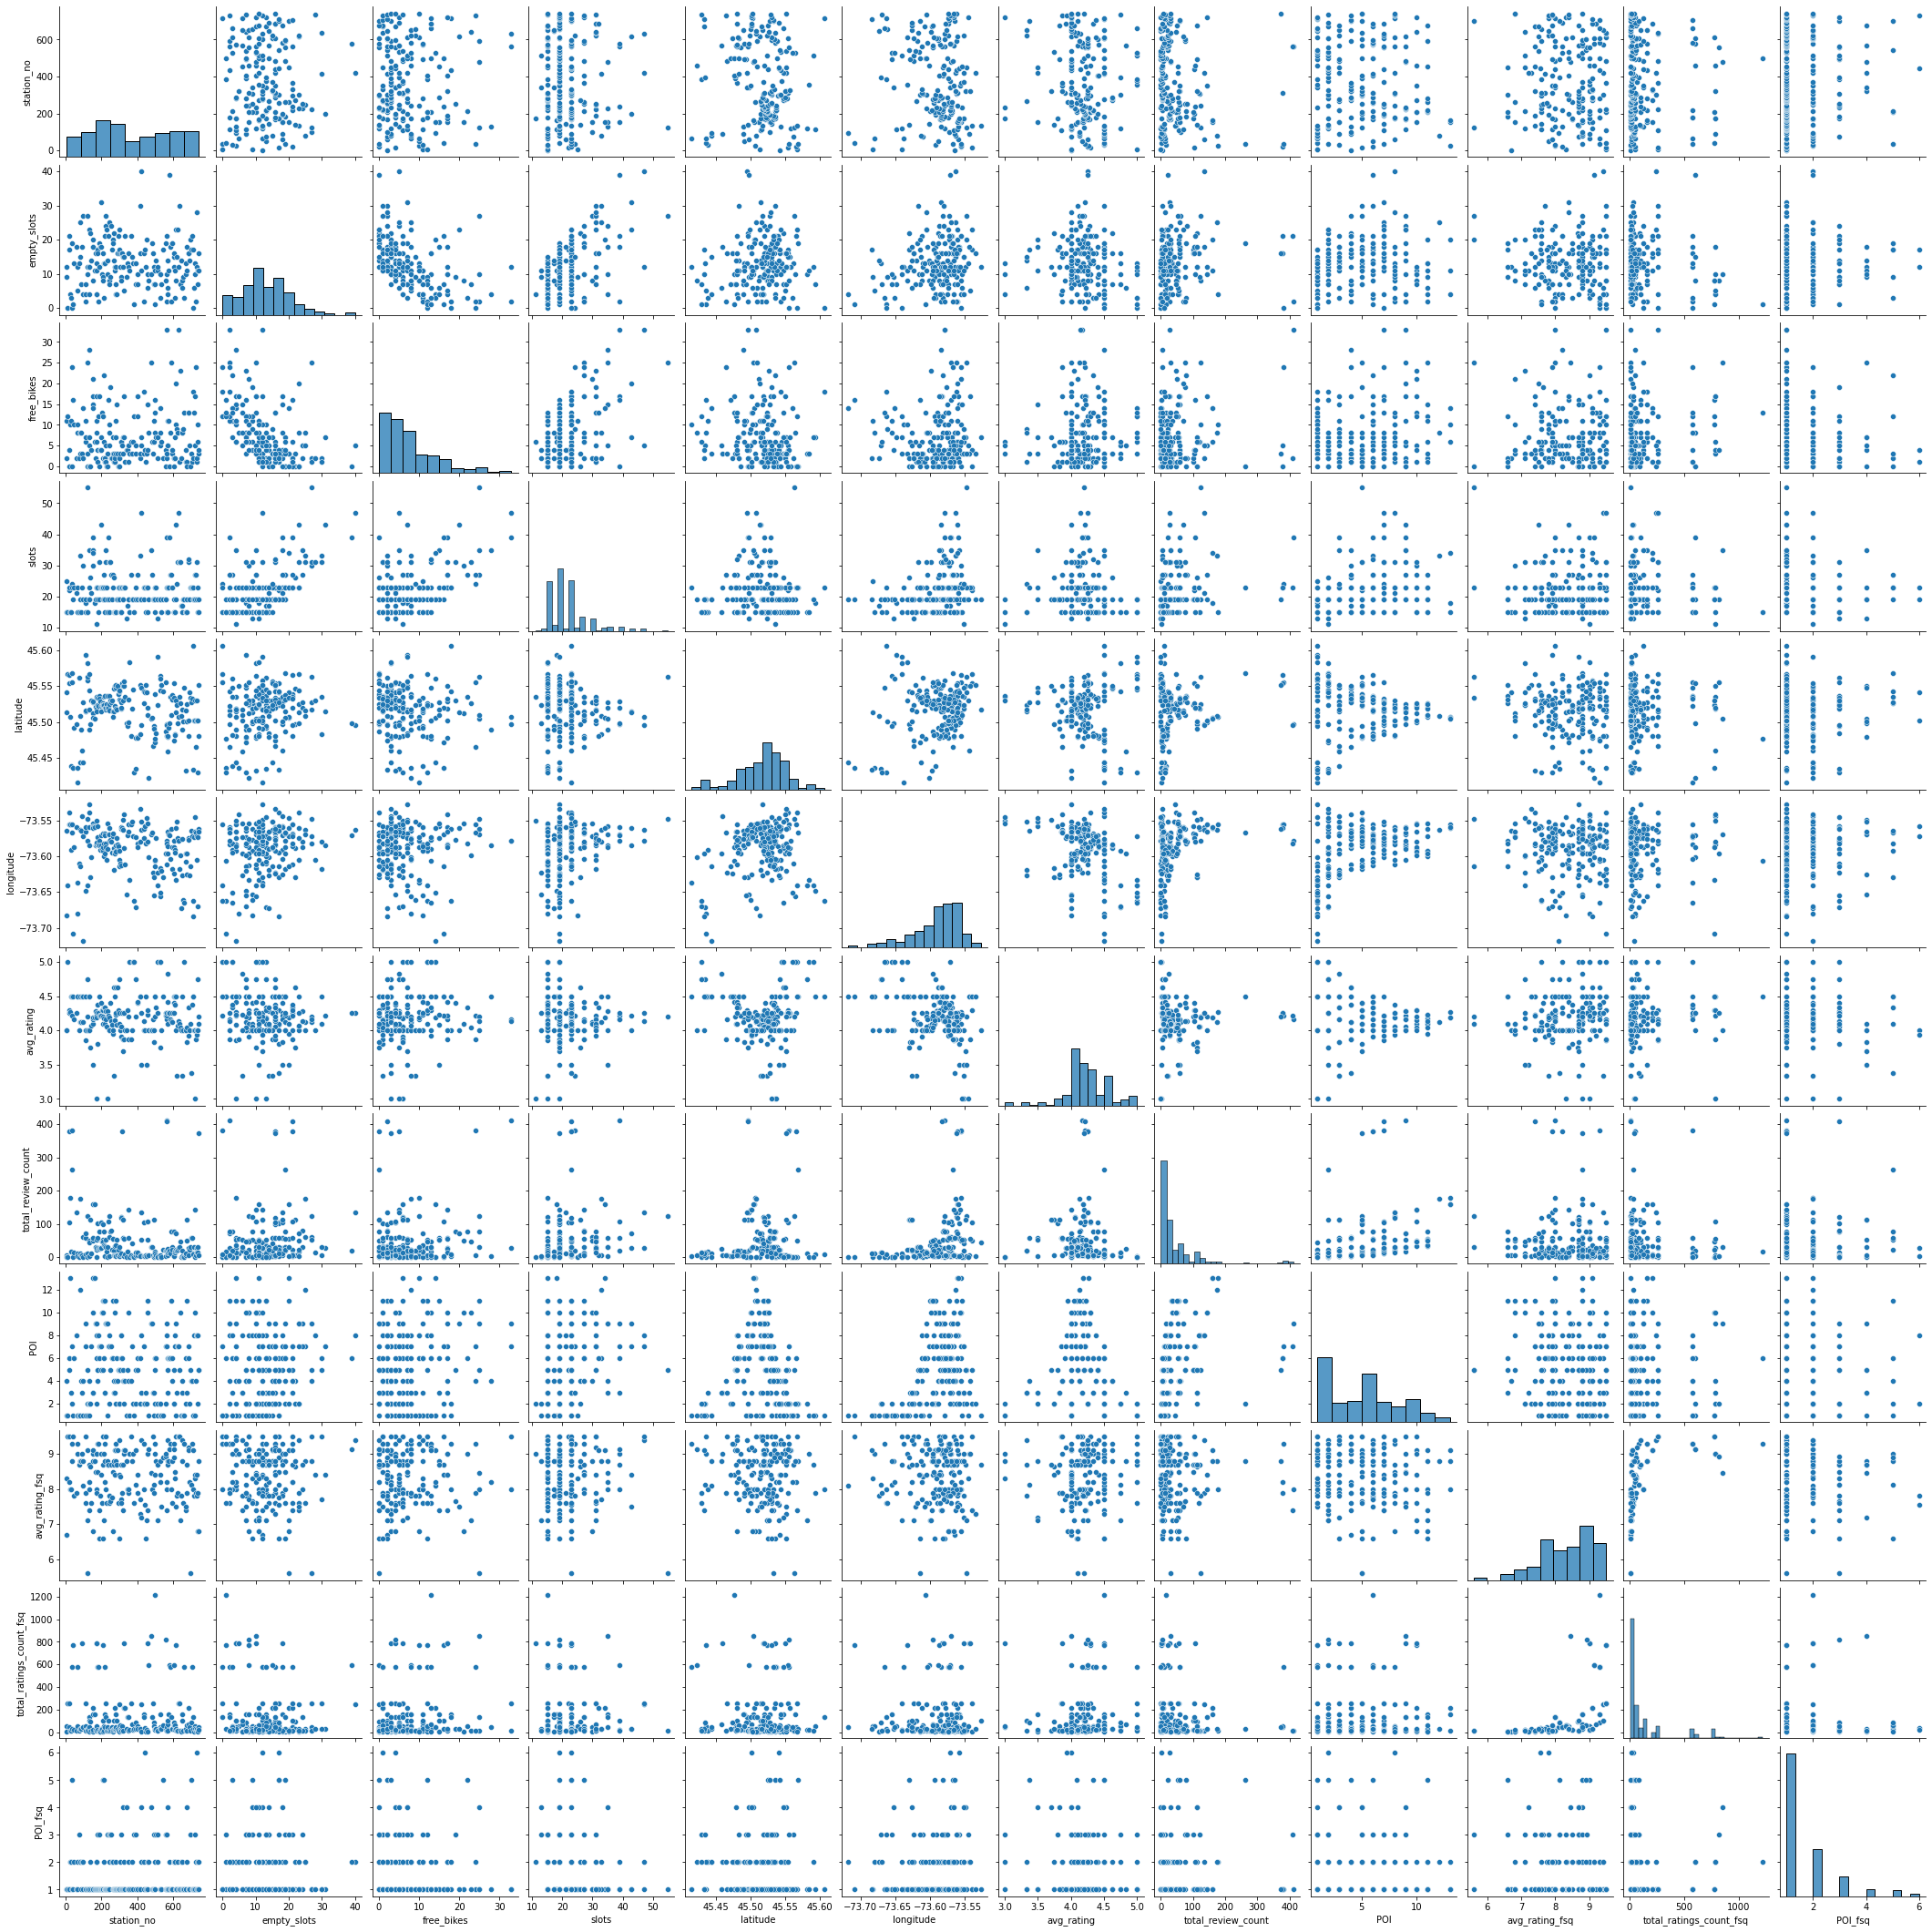

In [100]:
sns.pairplot(merged_df_no_na)
plt.show()

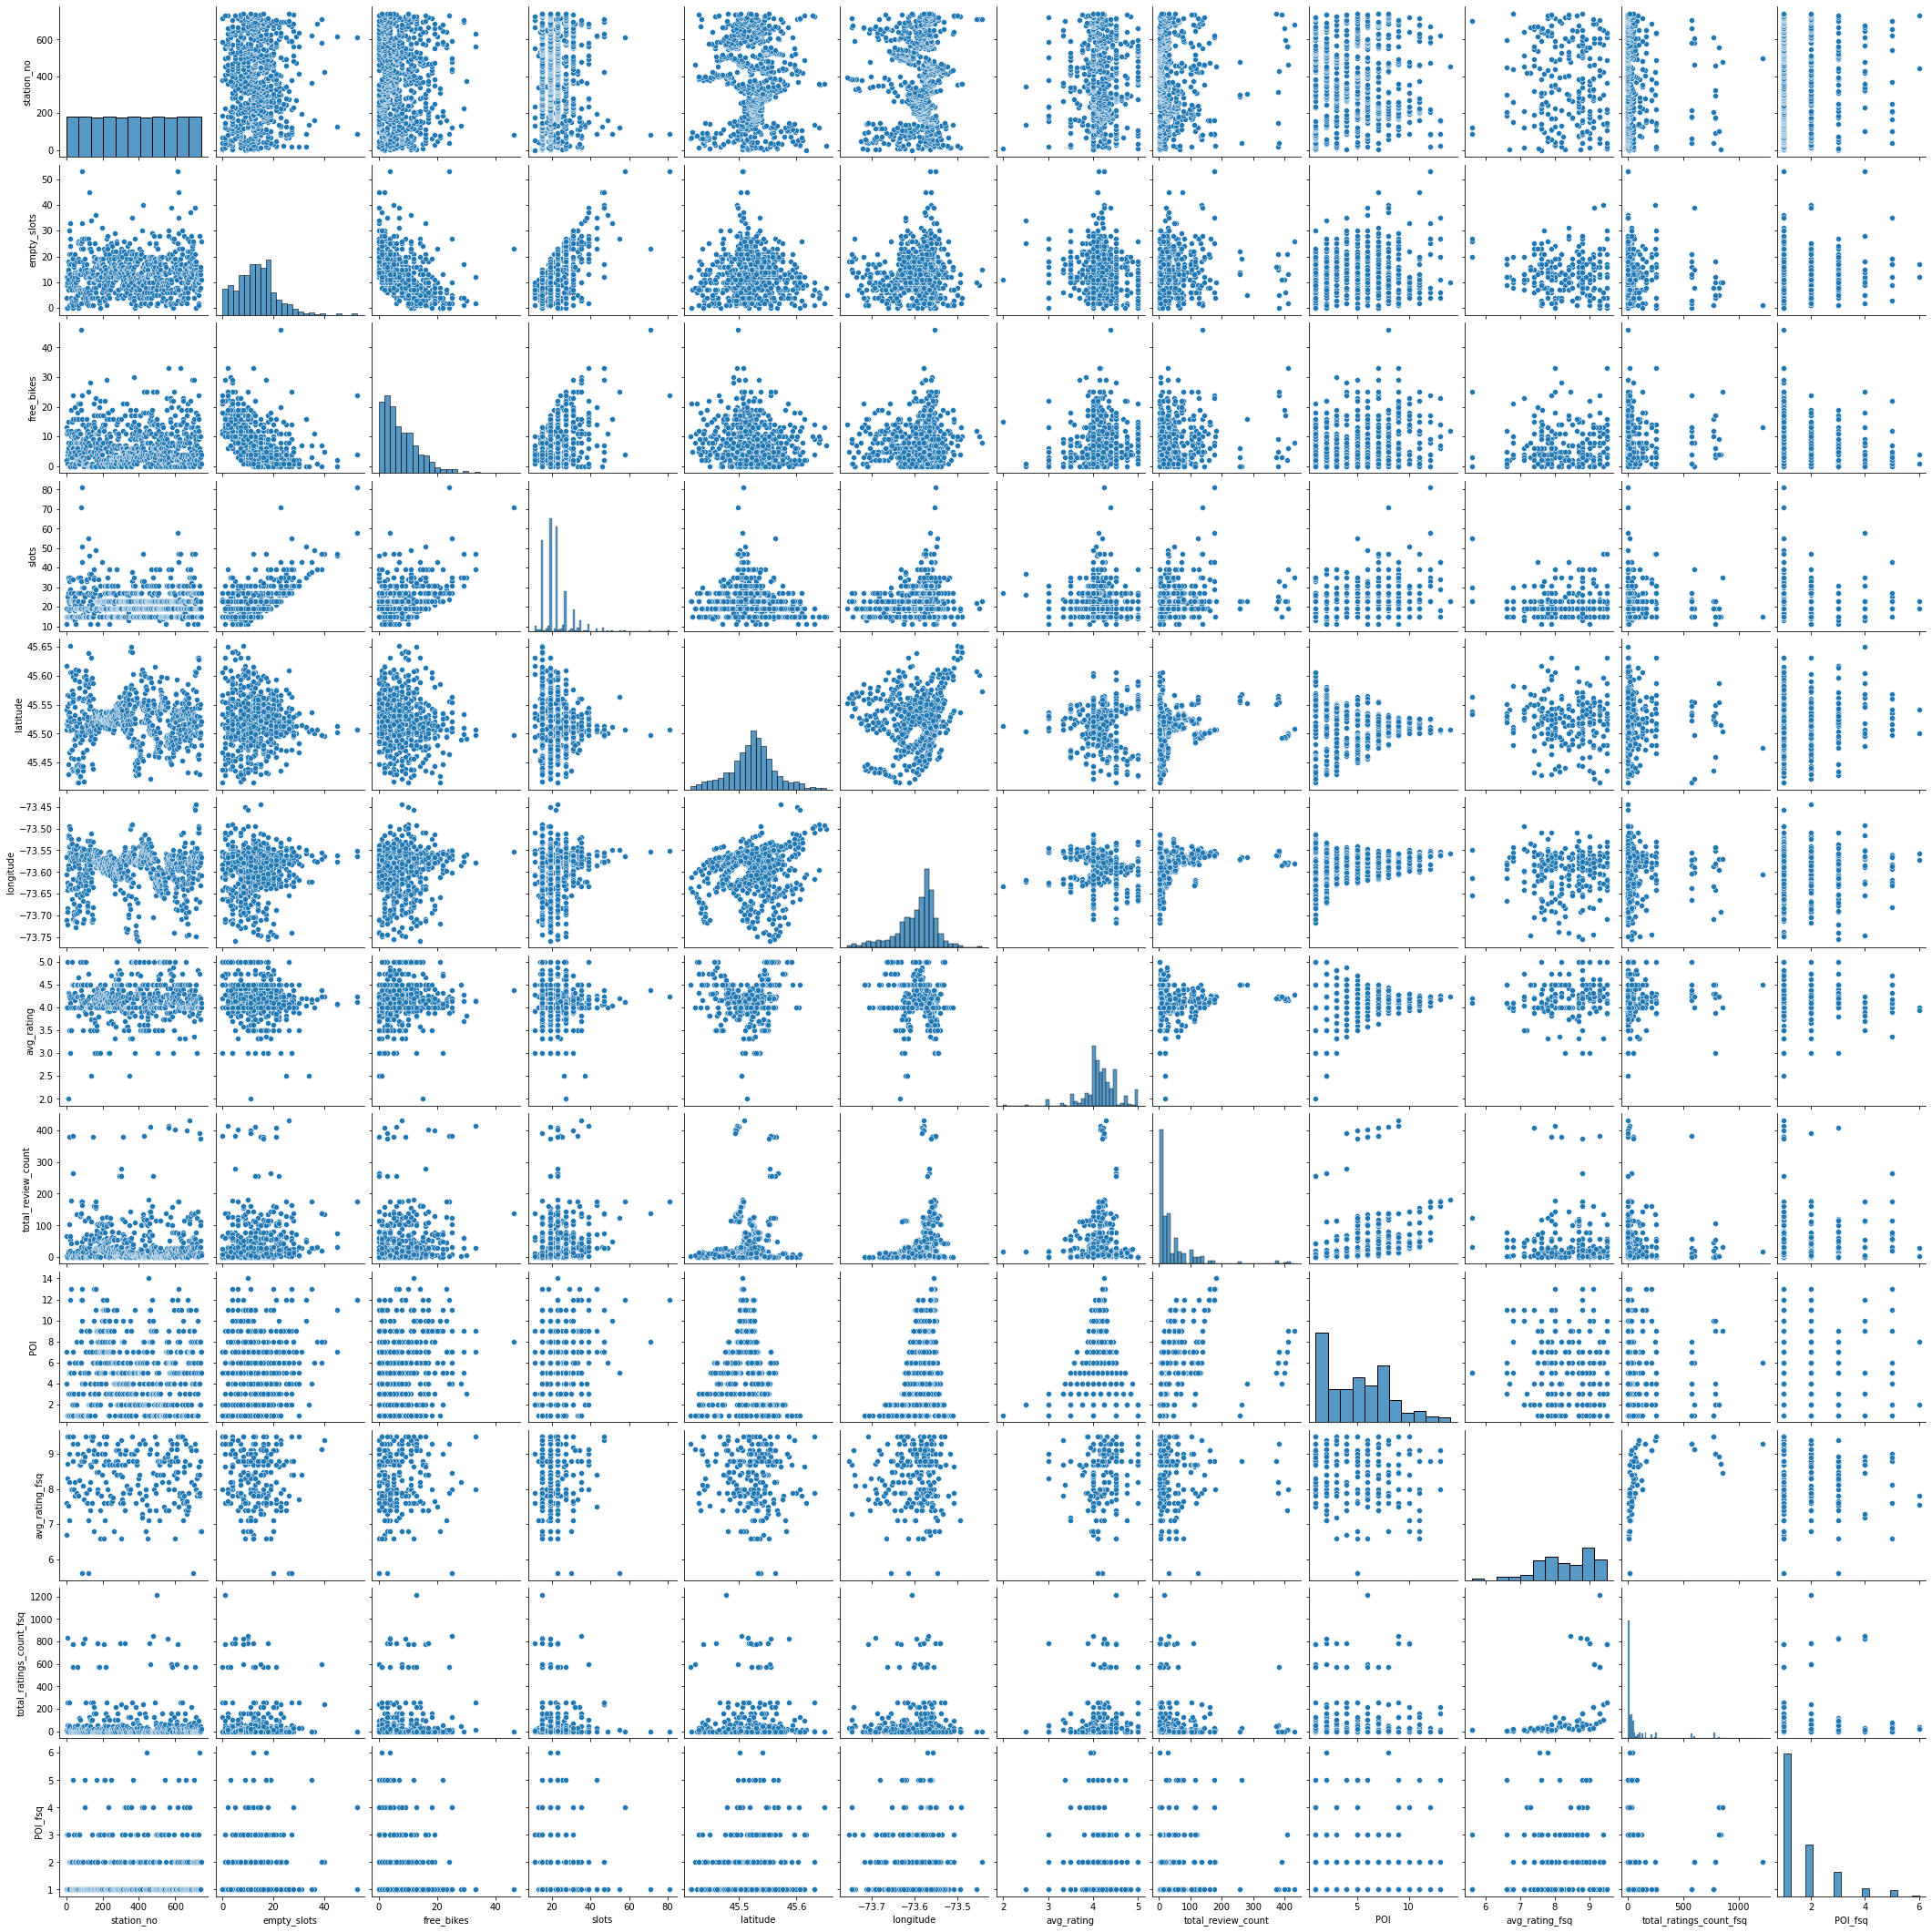

In [101]:
sns.pairplot(merged_df)
plt.show()

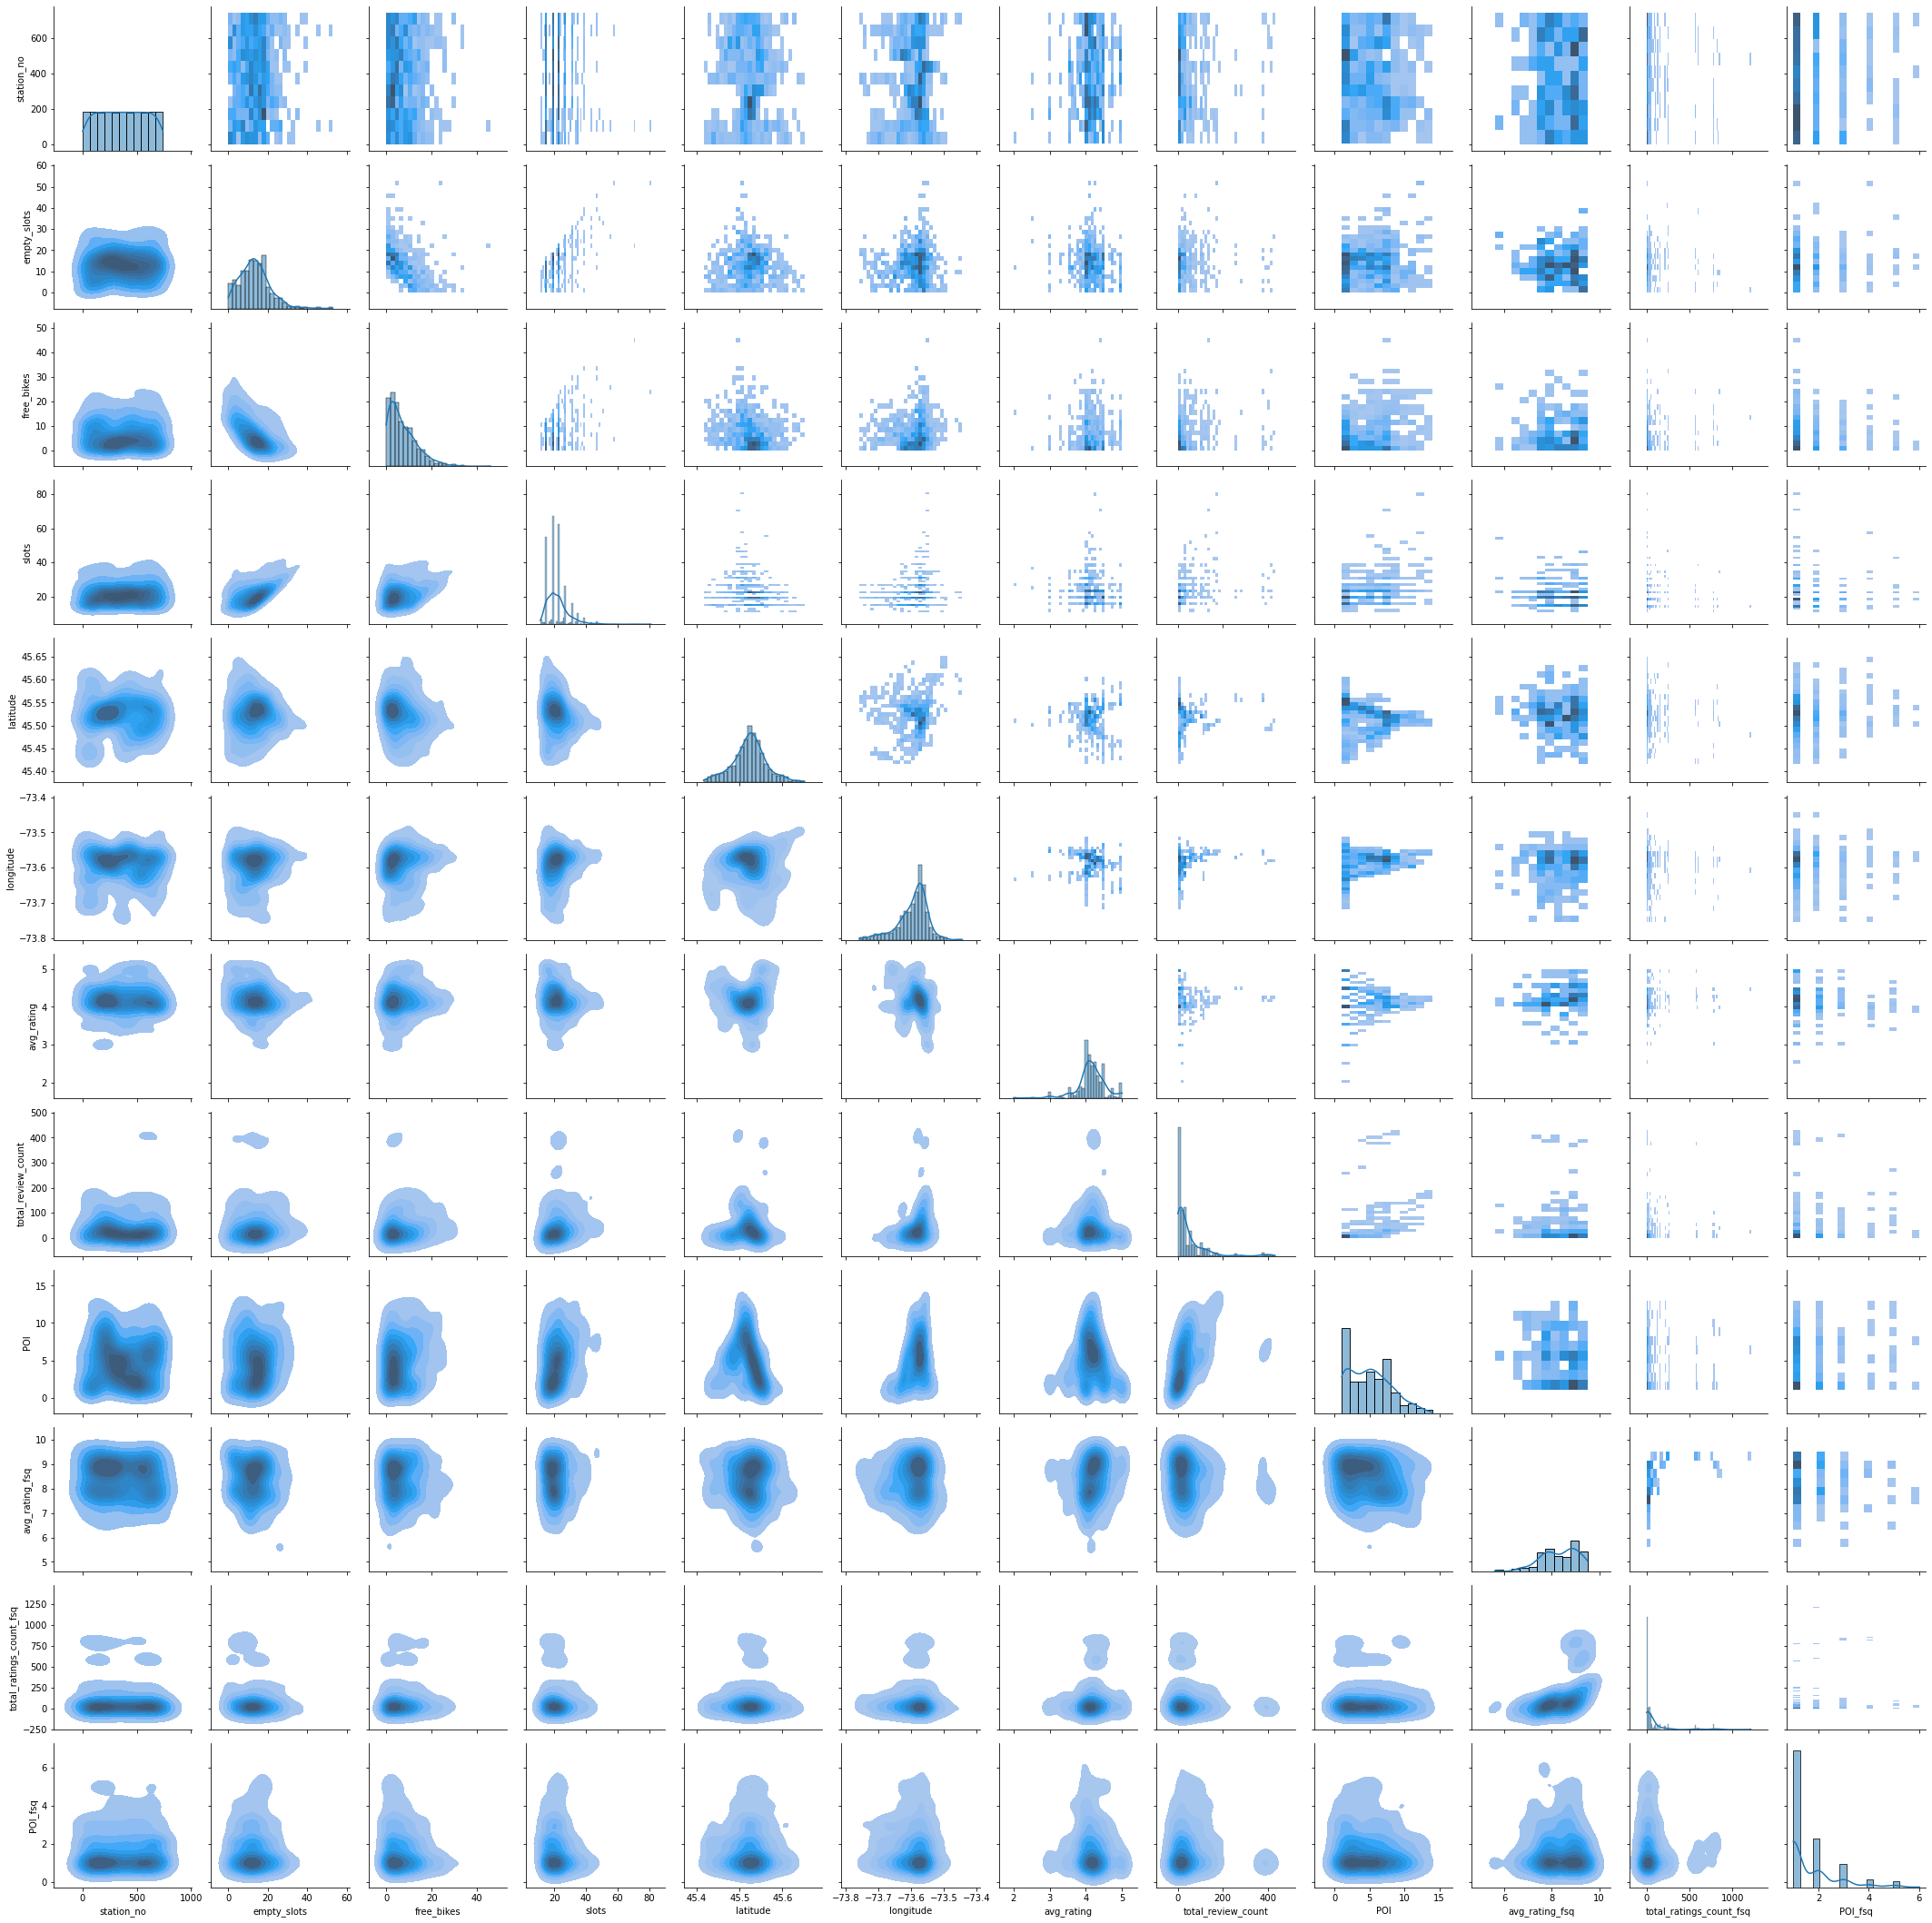

In [102]:
ax = sns.PairGrid(merged_df)
# can manually specify what we want to use for each region

ax.map_upper(sns.histplot)      # put in a seaborn function
ax.map_lower(sns.kdeplot, fill=True)
ax.map_diag(sns.histplot, kde=True)
plt.show()

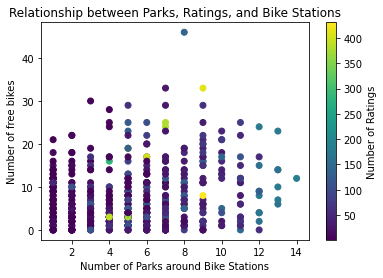

In [106]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(merged_df['POI'], merged_df['free_bikes'], c=merged_df['total_review_count'], cmap='viridis')

# Add labels and title
plt.xlabel('Number of Parks around Bike Stations')
plt.ylabel('Number of free bikes')
plt.title('Relationship between Parks, Ratings, and Bike Stations')

# Add a colorbar to indicate the number of ratings
cbar = plt.colorbar()
cbar.set_label('Number of Ratings')

# Show the plot
plt.show()


# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [121]:
from pathlib import Path
Path('bike_stations.db').touch()
import sqlite3
conn = sqlite3.connect('bike_stations.db')
c = conn.cursor()

merged_df.to_sql('bike_stations', conn, if_exists='append', index = False)

744

Look at the data before and after the join to validate your data.

In [122]:
with sqlite3.connect('bike_stations.db') as conn:
    df = pd.read_sql("select * from bike_stations", conn)
    print(df)

     station_no                                               name  \
0             0                               Cégep Marie-Victorin   
1             1      Gare d'autocars de Montréal (Berri / Ontario)   
2             2                          Molson / William-Tremblay   
3             3  Ateliers municipaux de St-Laurent (Cavendish /...   
4             4  Place Rodolphe-Rousseau (Gohier / Édouard-Laurin)   
..          ...                                                ...   
739         739                      de Maisonneuve / Mansfield SE   
740         740                                Duluth / St-Laurent   
741         741  Parc J.-Arthur-Champagne (de Chambly / du Mont...   
742         742                               Bloomfield / Bernard   
743         743                              de Laprairie / Centre   

     empty_slots  free_bikes  slots   latitude  longitude  avg_rating  \
0              9           2     11  45.617500 -73.606011         NaN   
1            